# Titanic Dataset Using H2O.ai
**By: Amr Ezzat**

## IMPORT RESOURCES

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,20 days 18 hours 0 mins
H2O_cluster_timezone:,Asia/Dubai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_home_oyiep6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,913 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [2]:
# Fetching dataset 
titanic_ds = h2o.import_file('/Users/home/Documents/Downloads/titanic.csv') 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# Checking the dataset was imported successfully 
titanic_ds

Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.25
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.925
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1
0,3,Mr. William Henry Allen,male,35,0,0,8.05
0,3,Mr. James Moran,male,27,0,0,8.4583
0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.075
1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333
1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30.0708


In [4]:
# Checking Number of columns and rows are correct and no missing data
titanic_ds.describe() 

Rows:887
Cols:8




,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
type,int,int,string,enum,real,int,int,real
mins,0.0,1.0,NaN,,0.42,0.0,0.0,0.0
mean,0.3855693348365276,2.3055242390078914,NaN,,29.47144306651637,0.5253664036076668,0.38331454340473503,32.30542018038329
maxs,1.0,3.0,NaN,,80.0,8.0,6.0,512.3292
sigma,0.4870041177510124,0.8366620036697728,NaN,,14.121908405462552,1.104668553867569,0.8074659070316833,49.78204040017391
zeros,545,0,0,,0,604,674,15
missing,0,0,0,0,0,0,0,0
0,0.0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.25
1,1.0,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1.0,0.0,71.2833
2,1.0,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.925


## DATA PREPARATION

In [5]:
# Converting Survived data type so h2o.ai can recognise that this is a 
# classification model.

titanic_ds["Survived"]= titanic_ds["Survived"].asfactor()

In [6]:
# Checking if survived was successfully converted
titanic_ds.types

{'Survived': 'enum',
 'Pclass': 'int',
 'Name': 'string',
 'Sex': 'enum',
 'Age': 'real',
 'Siblings/Spouses Aboard': 'int',
 'Parents/Children Aboard': 'int',
 'Fare': 'real'}

## TRAIN TEST SPLIT

In [7]:
# Splitting data 80% training data 20% test data
t_train,t_test= titanic_ds.split_frame(ratios=[.8])

In [8]:
# Arrange data (Remove'Survived', set 'Survived' as the value I 
# want to predict)
y = "Survived"
x = titanic_ds.columns
x.remove(y)

In [9]:
# Checking the split was done properly
t_train.describe()

Rows:721
Cols:8




,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
type,enum,int,string,enum,real,int,int,real
mins,,1.0,NaN,,0.42,0.0,0.0,0.0
mean,,2.3023578363384165,NaN,,29.549126213592235,0.5298196948682384,0.36338418862690747,32.73077267683775
maxs,,3.0,NaN,,80.0,8.0,6.0,512.3292
sigma,,0.8367313982912452,NaN,,14.190176773892773,1.1399371794096649,0.7608414042833603,51.296900212053266
zeros,,0,0,,0,494,549,12
missing,0,0,0,0,0,0,0,0
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.25
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1.0,0.0,71.2833
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.925


## H2O.ai

In [24]:
aml = H2OAutoML(max_runtime_secs = 1800 , seed = 45, verbosity="info" , exclude_algos = ['StackedEnsemble'])
aml.train(x=x, y=y, training_frame=t_train)

AutoML progress: |
22:00:17.727: Project: AutoML_20210430_220017721
22:00:17.737: Setting stopping tolerance adaptively based on the training frame: 0.03724194613619294
22:00:17.738: Build control seed: 45
22:00:17.757: training frame: Frame key: automl_training_py_3_sid_a065    cols: 8    rows: 721  chunks: 1    size: 30358  checksum: 7986457486614754988
22:00:17.758: validation frame: NULL
22:00:17.758: leaderboard frame: NULL
22:00:17.758: blending frame: NULL
22:00:17.758: response column: Survived
22:00:17.758: fold column: null
22:00:17.758: weights column: null
22:00:17.811: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
22:00:17.814: Disabling Algo: StackedEnsemble as requested by the user.
22:00:17.817: AutoML job created: 2021.04.30 22:00:17.719
2

## RESULTS

In [25]:
#Leaderboard
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid__3_AutoML_20210430_220017_model_2,0.875939,0.41694,0.843403,0.192446,0.360896,0.130246
DeepLearning_grid__1_AutoML_20210430_220017_model_11,0.874325,0.418924,0.847754,0.181604,0.358997,0.128879
GBM_1_AutoML_20210430_220017,0.87411,0.413258,0.854789,0.184349,0.358363,0.128424
DeepLearning_grid__1_AutoML_20210430_220017_model_2,0.87175,0.425924,0.833291,0.179353,0.361142,0.130423
GBM_3_AutoML_20210430_220017,0.870035,0.423429,0.844043,0.176811,0.361872,0.130951
DeepLearning_grid__1_AutoML_20210430_220017_model_1,0.869464,0.422967,0.833472,0.18417,0.36183,0.130921
GBM_2_AutoML_20210430_220017,0.869163,0.421482,0.843687,0.184057,0.360862,0.130221
GBM_grid__1_AutoML_20210430_220017_model_5,0.868211,0.425544,0.837135,0.184259,0.363245,0.131947
GBM_grid__1_AutoML_20210430_220017_model_9,0.867902,0.423223,0.84151,0.179722,0.360441,0.129918
DeepLearning_grid__3_AutoML_20210430_220017_model_6,0.867554,0.434371,0.839569,0.191237,0.367996,0.135421


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid__3_AutoML_20210430_220017_model_2,0.875939,0.41694,0.843403,0.192446,0.360896,0.130246,15565,0.055339,DeepLearning
DeepLearning_grid__1_AutoML_20210430_220017_model_11,0.874325,0.418924,0.847754,0.181604,0.358997,0.128879,13448,0.041126,DeepLearning
GBM_1_AutoML_20210430_220017,0.87411,0.413258,0.854789,0.184349,0.358363,0.128424,137,0.054582,GBM
DeepLearning_grid__1_AutoML_20210430_220017_model_2,0.87175,0.425924,0.833291,0.179353,0.361142,0.130423,10300,0.108719,DeepLearning
GBM_3_AutoML_20210430_220017,0.870035,0.423429,0.844043,0.176811,0.361872,0.130951,148,0.0515,GBM
DeepLearning_grid__1_AutoML_20210430_220017_model_1,0.869464,0.422967,0.833472,0.18417,0.36183,0.130921,9837,0.039106,DeepLearning
GBM_2_AutoML_20210430_220017,0.869163,0.421482,0.843687,0.184057,0.360862,0.130221,107,0.050761,GBM
GBM_grid__1_AutoML_20210430_220017_model_5,0.868211,0.425544,0.837135,0.184259,0.363245,0.131947,110,0.049416,GBM
GBM_grid__1_AutoML_20210430_220017_model_9,0.867902,0.423223,0.84151,0.179722,0.360441,0.129918,92,0.046535,GBM
DeepLearning_grid__3_AutoML_20210430_220017_model_6,0.867554,0.434371,0.839569,0.191237,0.367996,0.135421,13442,0.026954,DeepLearning


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid__3_AutoML_20210430_220017_model_2


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.349975624047513: 


,,0,1,Error,Rate
0,0,383.0,59.0,0.1335,(59.0/442.0)
1,1,42.0,237.0,0.1505,(42.0/279.0)
2,Total,425.0,296.0,0.1401,(101.0/721.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

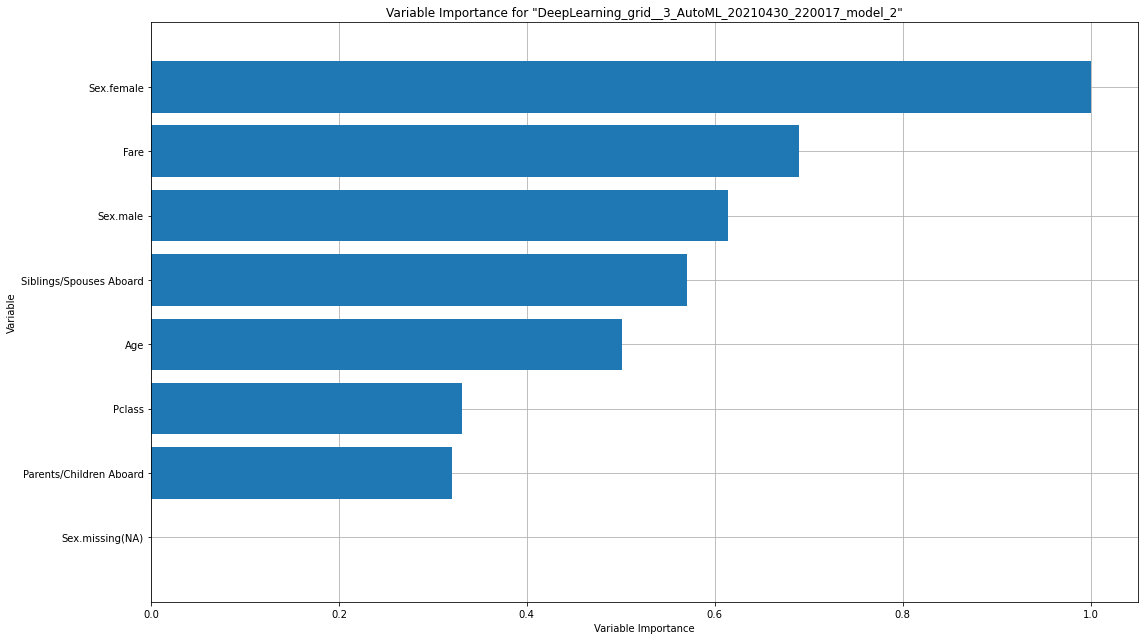

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

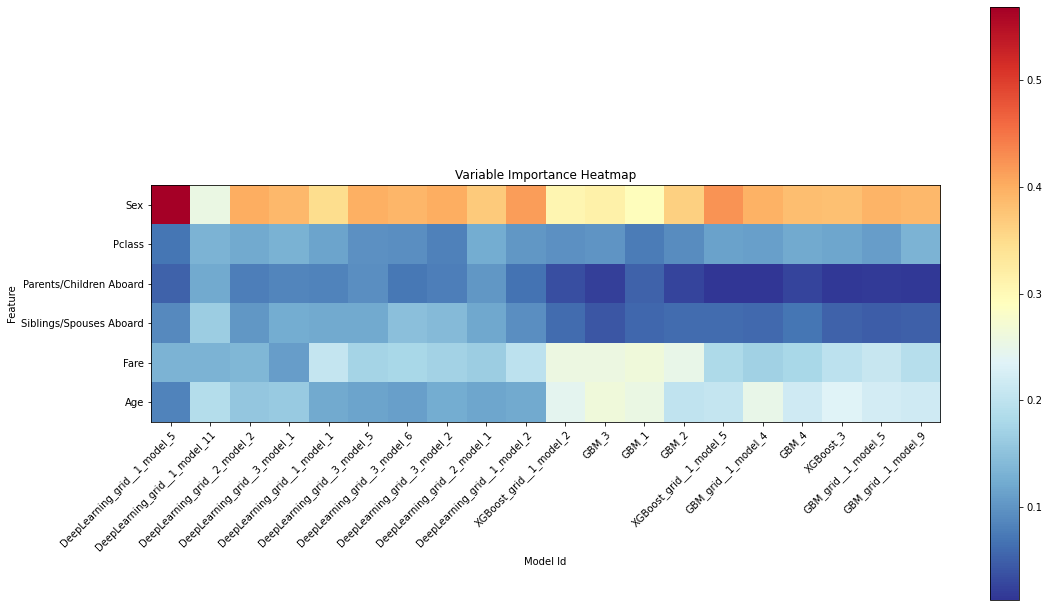

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

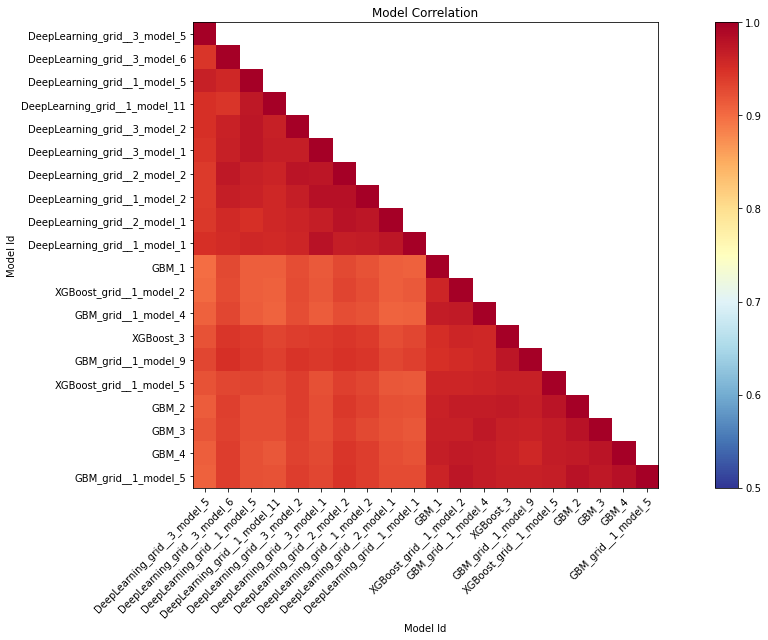

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

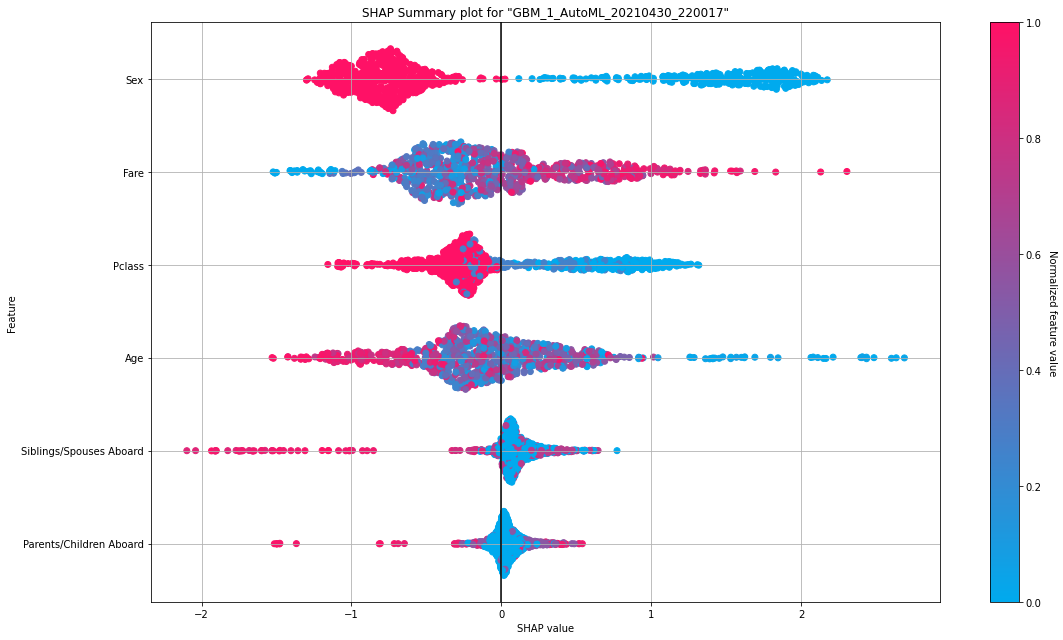

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

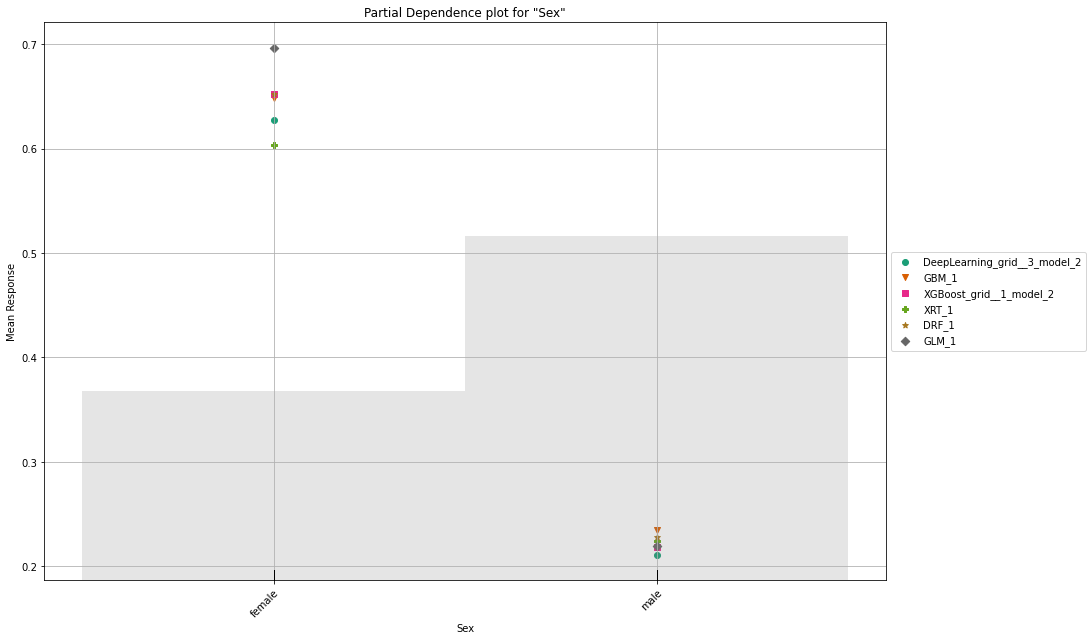

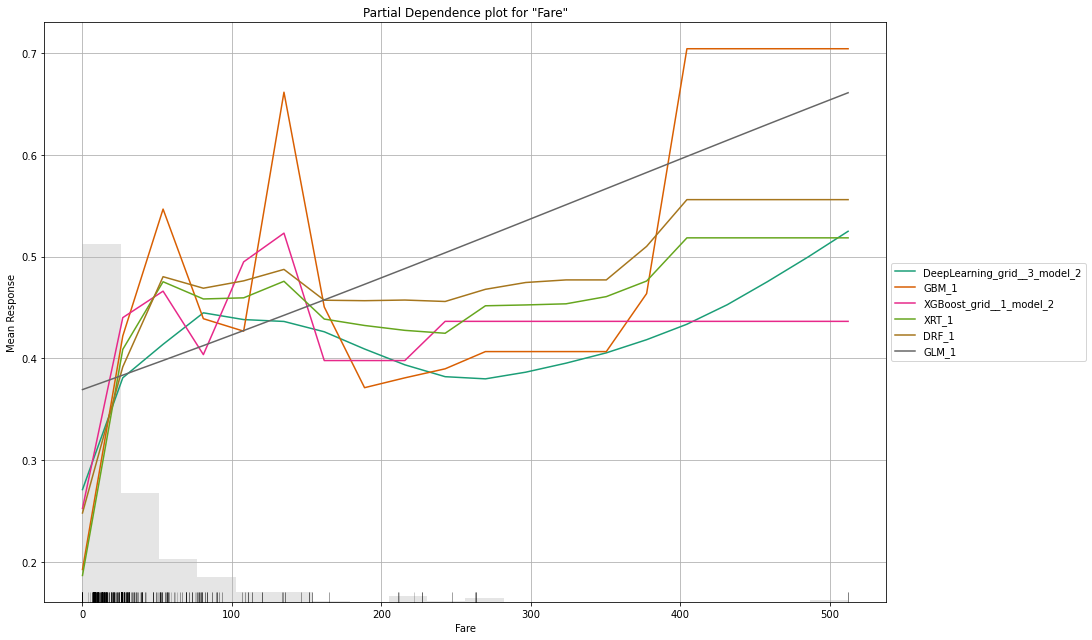

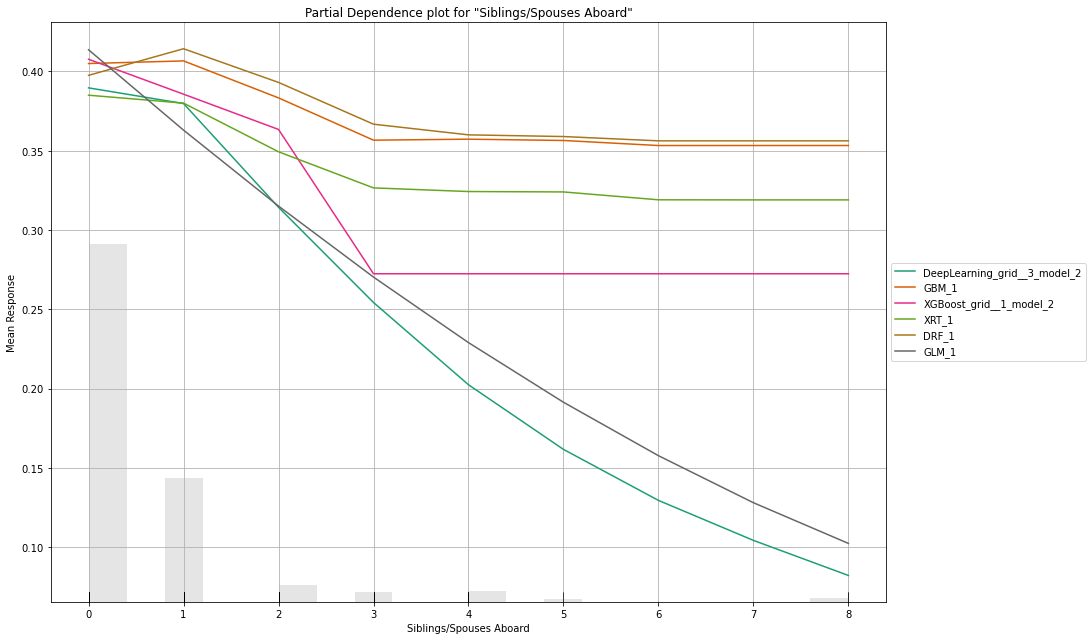

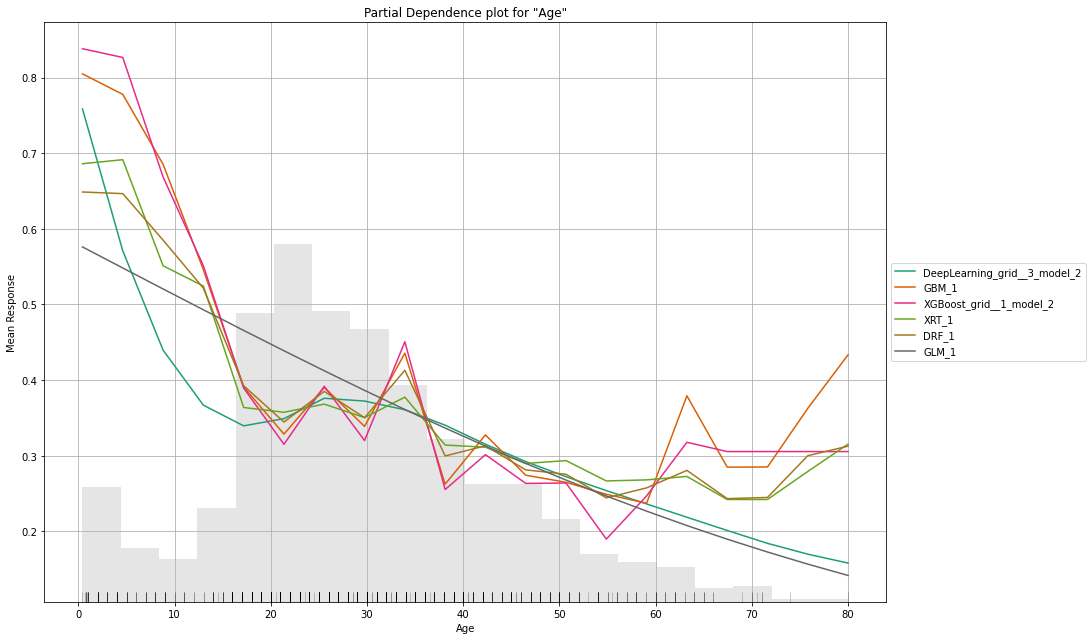

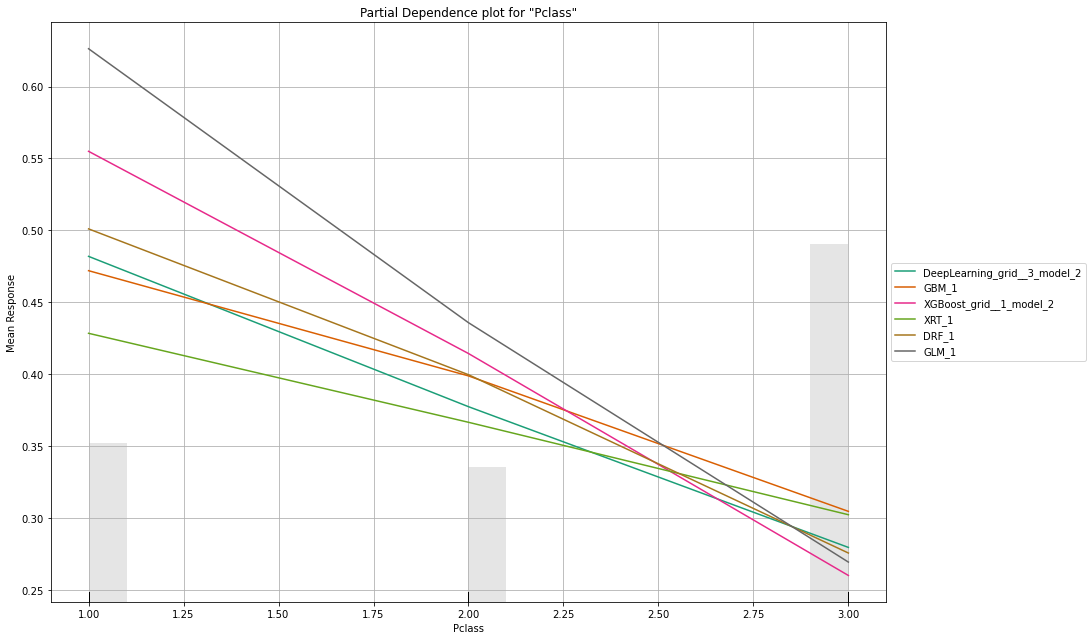

In [26]:
exa = aml.explain(titanic_ds)


In [28]:
# Get the leading pipeline and store it in a variable 
leader= aml.leader 
leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__3_AutoML_20210430_220017_model_2


Status of Neuron Layers: predicting Survived, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.8 KB, 3,655,470 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,20,,,,,,,,,
1,,2,20,RectifierDropout,10,0,0,0.122405,0.326893,0,0.0178513,0.38703,-0.220068,0.198206
2,,3,20,RectifierDropout,10,0,0,0.000710598,0.000838669,0,-0.086471,0.434758,0.278725,0.571282
3,,4,20,RectifierDropout,10,0,0,0.000481787,0.000432538,0,-0.047369,0.273703,-0.0842099,0.379275
4,,5,2,Softmax,,0,0,0.0011458,0.000658803,0,0.15543,1.54064,0.00404946,0.120721




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.11303664140165795
RMSE: 0.3362092226600245
LogLoss: 0.3685416253547282
Mean Per-Class Error: 0.1420108986522648
AUC: 0.9124418170907734
AUCPR: 0.8898574864375615
Gini: 0.8248836341815469

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.349975624047513: 


,,0,1,Error,Rate
0,0,383.0,59.0,0.1335,(59.0/442.0)
1,1,42.0,237.0,0.1505,(42.0/279.0)
2,Total,425.0,296.0,0.1401,(101.0/721.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349976,0.824348,193.0
1,max f2,0.171853,0.856769,263.0
2,max f0point5,0.539302,0.845272,128.0
3,max accuracy,0.383235,0.861304,186.0
4,max precision,0.999844,1.000000,0.0
5,max recall,0.008257,1.000000,393.0
6,max specificity,0.999844,1.000000,0.0
7,max absolute_mcc,0.377107,0.709885,187.0
8,max min_per_class_accuracy,0.330969,0.856631,198.0
9,max mean_per_class_accuracy,0.349976,0.857989,193.0



Gains/Lift Table: Avg response rate: 38.70 %, avg score: 36.50 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011096,0.998966,2.584229,2.584229,1.000000,0.999397,1.000000,0.999397,0.028674,0.028674,158.422939,158.422939,0.028674
1,2,0.020804,0.996744,2.584229,2.584229,1.000000,0.997725,1.000000,0.998617,0.025090,0.053763,158.422939,158.422939,0.053763
2,3,0.030513,0.995942,2.584229,2.584229,1.000000,0.996362,1.000000,0.997900,0.025090,0.078853,158.422939,158.422939,0.078853
3,4,0.040222,0.994835,2.584229,2.584229,1.000000,0.995559,1.000000,0.997335,0.025090,0.103943,158.422939,158.422939,0.103943
4,5,0.051318,0.991937,2.584229,2.584229,1.000000,0.993784,1.000000,0.996567,0.028674,0.132616,158.422939,158.422939,0.132616
5,6,0.101248,0.931427,2.440661,2.513429,0.944444,0.966545,0.972603,0.981762,0.121864,0.254480,144.066109,151.342859,0.249955
6,7,0.151179,0.818224,2.440661,2.489395,0.944444,0.861003,0.963303,0.941878,0.121864,0.376344,144.066109,148.939528,0.367294
7,8,0.201110,0.714303,2.225309,2.423829,0.861111,0.772293,0.937931,0.899774,0.111111,0.487455,122.530864,142.382895,0.467093
8,9,0.302358,0.500529,1.982423,2.276019,0.767123,0.576858,0.880734,0.791642,0.200717,0.688172,98.242255,127.601855,0.629349
9,10,0.400832,0.377049,1.528699,2.092421,0.591549,0.432866,0.809689,0.703500,0.150538,0.838710,52.869908,109.242103,0.714275




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.13024614059270914
RMSE: 0.3608963017165861
LogLoss: 0.41694022615069365
Mean Per-Class Error: 0.192445547284257
AUC: 0.8759386302080799
AUCPR: 0.8434028001008123
Gini: 0.7518772604161599

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25369729753817744: 


,,0,1,Error,Rate
0,0,340.0,102.0,0.2308,(102.0/442.0)
1,1,43.0,236.0,0.1541,(43.0/279.0)
2,Total,383.0,338.0,0.2011,(145.0/721.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.253697,0.764992,239.0
1,max f2,0.131551,0.826823,289.0
2,max f0point5,0.649623,0.812834,110.0
3,max accuracy,0.413798,0.816921,189.0
4,max precision,0.997922,1.000000,0.0
5,max recall,0.013276,1.000000,389.0
6,max specificity,0.997922,1.000000,0.0
7,max absolute_mcc,0.413798,0.613139,189.0
8,max min_per_class_accuracy,0.324080,0.799283,218.0
9,max mean_per_class_accuracy,0.253697,0.807554,239.0



Gains/Lift Table: Avg response rate: 38.70 %, avg score: 36.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011096,0.994832,2.584229,2.584229,1.000000,0.996556,1.000000,0.996556,0.028674,0.028674,158.422939,158.422939,0.028674
1,2,0.020804,0.993176,2.584229,2.584229,1.000000,0.994158,1.000000,0.995437,0.025090,0.053763,158.422939,158.422939,0.053763
2,3,0.030513,0.990953,2.215054,2.466764,0.857143,0.991876,0.954545,0.994304,0.021505,0.075269,121.505376,146.676442,0.073006
3,4,0.040222,0.987411,2.584229,2.495118,1.000000,0.989333,0.965517,0.993104,0.025090,0.100358,158.422939,149.511803,0.098096
4,5,0.051318,0.985377,2.584229,2.514385,1.000000,0.986340,0.972973,0.991642,0.028674,0.129032,158.422939,151.438535,0.126770
5,6,0.101248,0.928518,2.440661,2.478028,0.944444,0.964200,0.958904,0.978109,0.121864,0.250896,144.066109,147.802818,0.244109
6,7,0.151179,0.875406,2.297093,2.418270,0.888889,0.900285,0.935780,0.952405,0.114695,0.365591,129.709279,141.826971,0.349754
7,8,0.201110,0.772481,2.368877,2.406007,0.916667,0.830600,0.931034,0.922164,0.118280,0.483871,136.887694,140.600667,0.461247
8,9,0.300971,0.541185,1.507467,2.107874,0.583333,0.623852,0.815668,0.823185,0.150538,0.634409,50.746714,110.787374,0.543911
9,10,0.400832,0.382226,1.363899,1.922524,0.527778,0.462510,0.743945,0.733328,0.136201,0.770609,36.389885,92.252360,0.603189




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.82243294,0.043688066,0.84827584,0.8611111,0.7569444,0.7986111,0.8472222
1,auc,0.8778755,0.03795759,0.90221816,0.8955303,0.8494318,0.8266129,0.91558444
2,aucpr,0.84913737,0.051458724,0.8765186,0.8724766,0.76791483,0.83095753,0.89781946
3,err,0.17756705,0.043688066,0.15172414,0.1388889,0.24305555,0.2013889,0.15277778
4,err_count,25.6,6.2689714,22.0,20.0,35.0,29.0,22.0
5,f0point5,0.76686066,0.06318496,0.7781457,0.84541065,0.67105263,0.75443786,0.7852564
6,f1,0.78558815,0.0290447,0.8103448,0.7777778,0.74452555,0.77862597,0.81666666
7,f2,0.81133294,0.05402756,0.84532374,0.7201646,0.8360656,0.8044164,0.8506944
8,lift_top_group,2.5948305,0.18417549,2.6851852,2.8235295,2.5714285,2.3225806,2.5714285
9,logloss,0.41700184,0.072767,0.3725755,0.370481,0.49729824,0.49491522,0.34973928



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-04-30 22:22:46,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-30 22:22:46,2 min 15.440 sec,138653 obs/sec,10.0,1,7210.0,0.402639,0.537460,0.316597,0.834769,0.790164,2.261201,0.244105
2,,2021-04-30 22:22:51,2 min 20.446 sec,178571 obs/sec,1250.0,125,901250.0,0.342960,0.382019,0.504173,0.890490,0.869297,2.584229,0.163662
3,,2021-04-30 22:22:56,2 min 25.460 sec,208236 obs/sec,2900.0,290,2090900.0,0.334848,0.368004,0.527352,0.906113,0.883581,2.584229,0.148405
4,,2021-04-30 22:23:01,2 min 30.472 sec,233910 obs/sec,4880.0,488,3518480.0,0.333538,0.365823,0.531040,0.911246,0.889836,2.584229,0.141470
5,,2021-04-30 22:23:02,2 min 30.937 sec,235897 obs/sec,5070.0,507,3655470.0,0.336209,0.368542,0.523500,0.912442,0.889857,2.584229,0.140083



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Sex.female,1.000000,1.000000,0.248369
1,Fare,0.689836,0.689836,0.171334
2,Sex.male,0.614493,0.614493,0.152621
3,Siblings/Spouses Aboard,0.570159,0.570159,0.141610
4,Age,0.500945,0.500945,0.124419
5,Pclass,0.330950,0.330950,0.082198
6,Parents/Children Aboard,0.319888,0.319888,0.079450
7,Sex.missing(NA),0.000000,0.000000,0.000000


In [29]:
# Get the variable importance
leader.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,Sex.female,1.000000,1.000000,0.248369
1,Fare,0.689836,0.689836,0.171334
2,Sex.male,0.614493,0.614493,0.152621
3,Siblings/Spouses Aboard,0.570159,0.570159,0.141610
4,Age,0.500945,0.500945,0.124419
5,Pclass,0.330950,0.330950,0.082198
6,Parents/Children Aboard,0.319888,0.319888,0.079450
7,Sex.missing(NA),0.000000,0.000000,0.000000


In [30]:
# Export Mojo file
aml.leader.download_mojo(path = "/Users/home/Documents/Downloads/")

'/Users/home/Documents/Downloads/DeepLearning_grid__3_AutoML_20210430_220017_model_2.zip'